<a href="https://colab.research.google.com/github/horasan/eng_to_sql_ner/blob/main/NER_B_12_schema_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# read data from google drive
drive.mount('/content/drive')
FOLDER_PATH = "NER_for_SQL"
FULL_PATH = "/content/drive/My Drive/Colab Notebooks/" + FOLDER_PATH + "/"

Mounted at /content/drive


In [3]:
schema_file = "NER-B-1_schema_info_trs.json"

In [2]:
import json
import networkx as nx
from itertools import product

def normalize(name):
    return name.lower()

def load_schema_config(schema_json_path):
    with open(schema_json_path, 'r') as f:
        schema = json.load(f)

    graph = nx.Graph()
    entity_to_tables = {}

    # Add tables and columns as nodes and map entities
    for table in schema['tables']:
        table_name = normalize(table['table_name'])
        graph.add_node(table_name)
        for col in table.get('columns', []):
            col_name = normalize(col['name'])
            if 'business_entity' in col:
                entity = normalize(col['business_entity'])
                entity_to_tables.setdefault(entity, set()).add(table_name)

    # Add relationships as edges with FK info as attributes
    for rel in schema.get('relationships', []):
        from_table = normalize(rel['from_table'])
        to_table = normalize(rel['to_table'])
        from_col = normalize(rel.get('from_column', ''))
        to_col = normalize(rel.get('to_column', ''))
        graph.add_edge(from_table, to_table, from_column=from_col, to_column=to_col)

    return entity_to_tables, graph

In [4]:
entity_to_tables, graph = load_schema_config(FULL_PATH + schema_file)

<ipython-input-5-2327333855>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


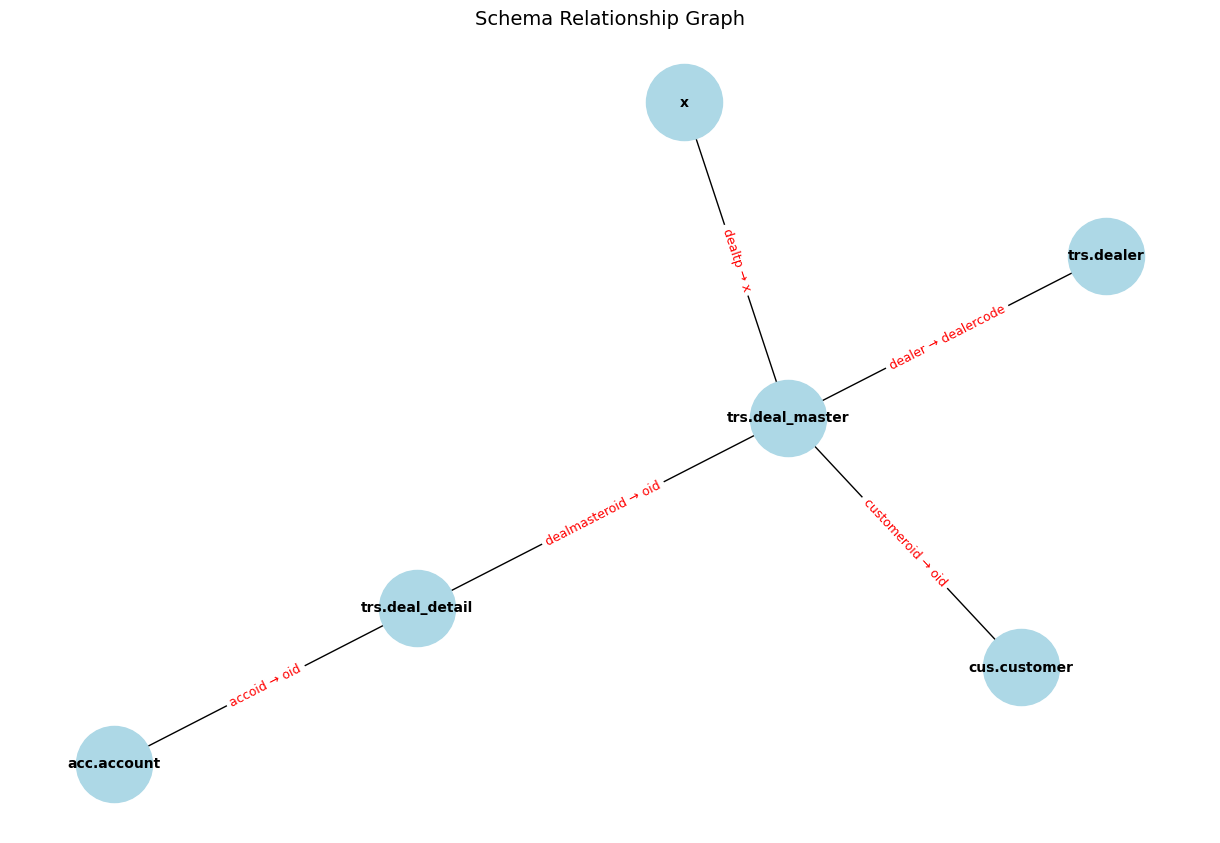

In [5]:
#graph
import networkx as nx
import matplotlib.pyplot as plt

schema_graph = graph

# Prepare edge labels with FK details
edge_labels = {}
for u, v, data in schema_graph.edges(data=True):
    edge_labels[(u, v)] = f"{data['from_column']} → {data['to_column']}"

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(schema_graph, seed=42)
nx.draw(schema_graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(schema_graph, pos, edge_labels=edge_labels, font_color='red', font_size=9)
plt.title("Schema Relationship Graph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
